### 1. Getting Started by loading the datasets in Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn import decomposition


%matplotlib inline


In [5]:
df= pd.read_csv("NCI60_data.csv",index_col=0)
df.index = df.index.get_level_values(0).str[1:].astype(int)
df

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [11]:
df2 = pd.read_csv("NCI60_labs.csv", index_col = 0, header = 0)
df2

,x
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST
...,...
60,MELANOMA
61,MELANOMA
62,MELANOMA
63,MELANOMA


 ### 1 (a)
 The dataset NCI60_data.csv has 64 rows and 6830 columns and there are 64 rows and 6830 columns in the dataset NCI60_labs.csv.

### 1 (b) 
Finding Missing Values:

In [14]:
# looking for missing values in the first dataset
df.isna().any()



1       False
2       False
3       False
4       False
5       False
        ...  
6826    False
6827    False
6828    False
6829    False
6830    False
Length: 6830, dtype: bool

In [13]:
# looking for missing values in the second dataset
df2.isna().any()

x    False
dtype: bool

1 (b) There were no missing values found in both datasets.

### 2. Data Preprocessing:

In [17]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


Looking through the above data we can identify that the mean is not equal to 0 and the standard deviation is not equal to 1. Therefore, the dataset df is not standardized.

In [18]:
# Making the data into a standardized form
df_Standardized = pd.DataFrame(preprocessing.scale(df, axis = 0), index = df.index, columns = df.columns)

df_Standardized.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,...,6.400000e+01,6.400000e+01,64.000000,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,-8.673617e-18,0.000000,-3.014082e-17,3.989864e-17,-2.428613e-17,-5.204170e-18,2.428613e-17,-3.816392e-17,1.734723e-18,-4.510281e-17,...,-3.469447e-18,2.081668e-17,0.000000,0.000000,1.040834e-17,4.510281e-17,-1.387779e-17,-2.081668e-17,4.076600e-17,1.162265e-16
std,1.007905e+00,1.007905,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,...,1.007905e+00,1.007905e+00,1.007905,1.007905,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00
min,-2.377270e+00,-2.877193,-3.931262e+00,-2.105826e+00,-1.768435e+00,-2.032645e+00,-2.555051e+00,-2.029547e+00,-2.115392e+00,-2.630141e+00,...,-2.004194e+00,-1.048700e+00,-1.298802,-2.569869,-2.344267e+00,-1.617887e+00,-1.767830e+00,-2.014441e+00,-1.850851e+00,-1.985687e+00
25%,-8.071713e-01,-0.501898,-4.013951e-01,-9.173725e-01,-5.217310e-01,-4.687243e-01,-7.230938e-01,-5.412910e-01,-8.472563e-01,-7.803041e-01,...,-6.570984e-01,-5.165919e-01,-0.559558,-0.566848,-5.245635e-01,-5.274250e-01,-5.779040e-01,-7.115609e-01,-7.206783e-01,-8.304080e-01
50%,4.353664e-02,0.037011,4.634208e-02,3.033881e-01,-5.421676e-02,-1.932168e-02,-5.352873e-02,6.883255e-02,-1.832542e-03,-3.022115e-02,...,9.005226e-02,-3.585180e-01,-0.265209,-0.194028,-1.590203e-01,-1.675724e-01,-7.566773e-02,1.623610e-01,-2.312333e-01,-9.583766e-02
75%,7.515195e-01,0.506077,4.243081e-01,9.426144e-01,3.821298e-01,5.127569e-01,6.194484e-01,5.451041e-01,6.909453e-01,7.042364e-01,...,4.352942e-01,1.401940e-01,0.114525,0.290779,3.165084e-01,1.868279e-01,3.686063e-02,5.497099e-01,5.719101e-01,7.389014e-01
max,2.190290e+00,3.017748,2.721339e+00,1.687994e+00,3.509280e+00,3.317043e+00,2.502375e+00,2.226625e+00,2.323083e+00,2.310550e+00,...,3.406828e+00,4.272379e+00,4.687052,4.336512,4.400030e+00,4.848555e+00,4.375607e+00,3.440368e+00,3.381761e+00,2.535260e+00


### 3. Adding an index name as "cancer type" to NCI_data:

In [19]:
#assigning the new column 'Cancer Type'
df2.columns = ['Cancer Type']
df2.head()

,Cancer Type
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST


In [23]:
# to concatenate the databases we will use the join function.
new_df = df_Standardized.join(df2)
new_df.set_index("Cancer Type", inplace = True)
new_df.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
Cancer Type,,,,,,,,,,,,,,,,,,,,,
CNS,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
CNS,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.215657,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446
CNS,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,0.452274,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838
RENAL,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-1.313667,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408
BREAST,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,0.718297,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992


### 4. K-Means Clustering:

In [22]:
from sklearn.cluster import KMeans

ccluster = KMeans(n_clusters = 5, n_init = 150, random_state = 123)
ccluster.fit(df)

KMeans(n_clusters=5, n_init=150, random_state=123)

In [24]:
pd.Series(ccluster.labels_).value_counts()

3    23
2    20
1     9
0     8
4     4
dtype: int64

In [25]:
# Checking the mean and centroid.
ccluster.cluster_centers_

array([[-0.22624756, -0.2787475 , -0.22999756, ..., -0.38499756,
         0.14125244,  0.0675    ],
       [-0.01000217, -0.09000217,  0.05110894, ..., -0.55666883,
         0.08444228,  0.37666444],
       [-0.07025097,  0.18025   , -0.10650098, ...,  0.08299902,
         0.29649903,  0.56099905],
       [ 0.05065048, -0.14195822,  0.00456352, ..., -0.16108865,
        -0.11847996, -0.58065387],
       [ 0.23      ,  0.23      ,  0.5325    , ...,  0.505     ,
         0.80499988,  1.8475    ]])

In [27]:
ccluster.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
pd.crosstab(new_df.index, ccluster.labels_)

col_0,0,1,2,3,4
row_0,,,,,
BREAST,0,2,0,3,2
CNS,0,0,0,5,0
COLON,0,0,7,0,0
K562A-repro,1,0,0,0,0
K562B-repro,1,0,0,0,0
LEUKEMIA,6,0,0,0,0
MCF7A-repro,0,0,0,0,1
MCF7D-repro,0,0,0,0,1
MELANOMA,0,7,0,1,0


K-Means is more effective for CNS, COLON, LEUKEMIA, and RENAL cancers, whereas hierarchical clustering proves to be more efficient for NSLC, OVARIAN, and PROSTATE cancers, as indicated by their capacity to cluster similar cancer types together.

### 5. Hierarchical Clustering:

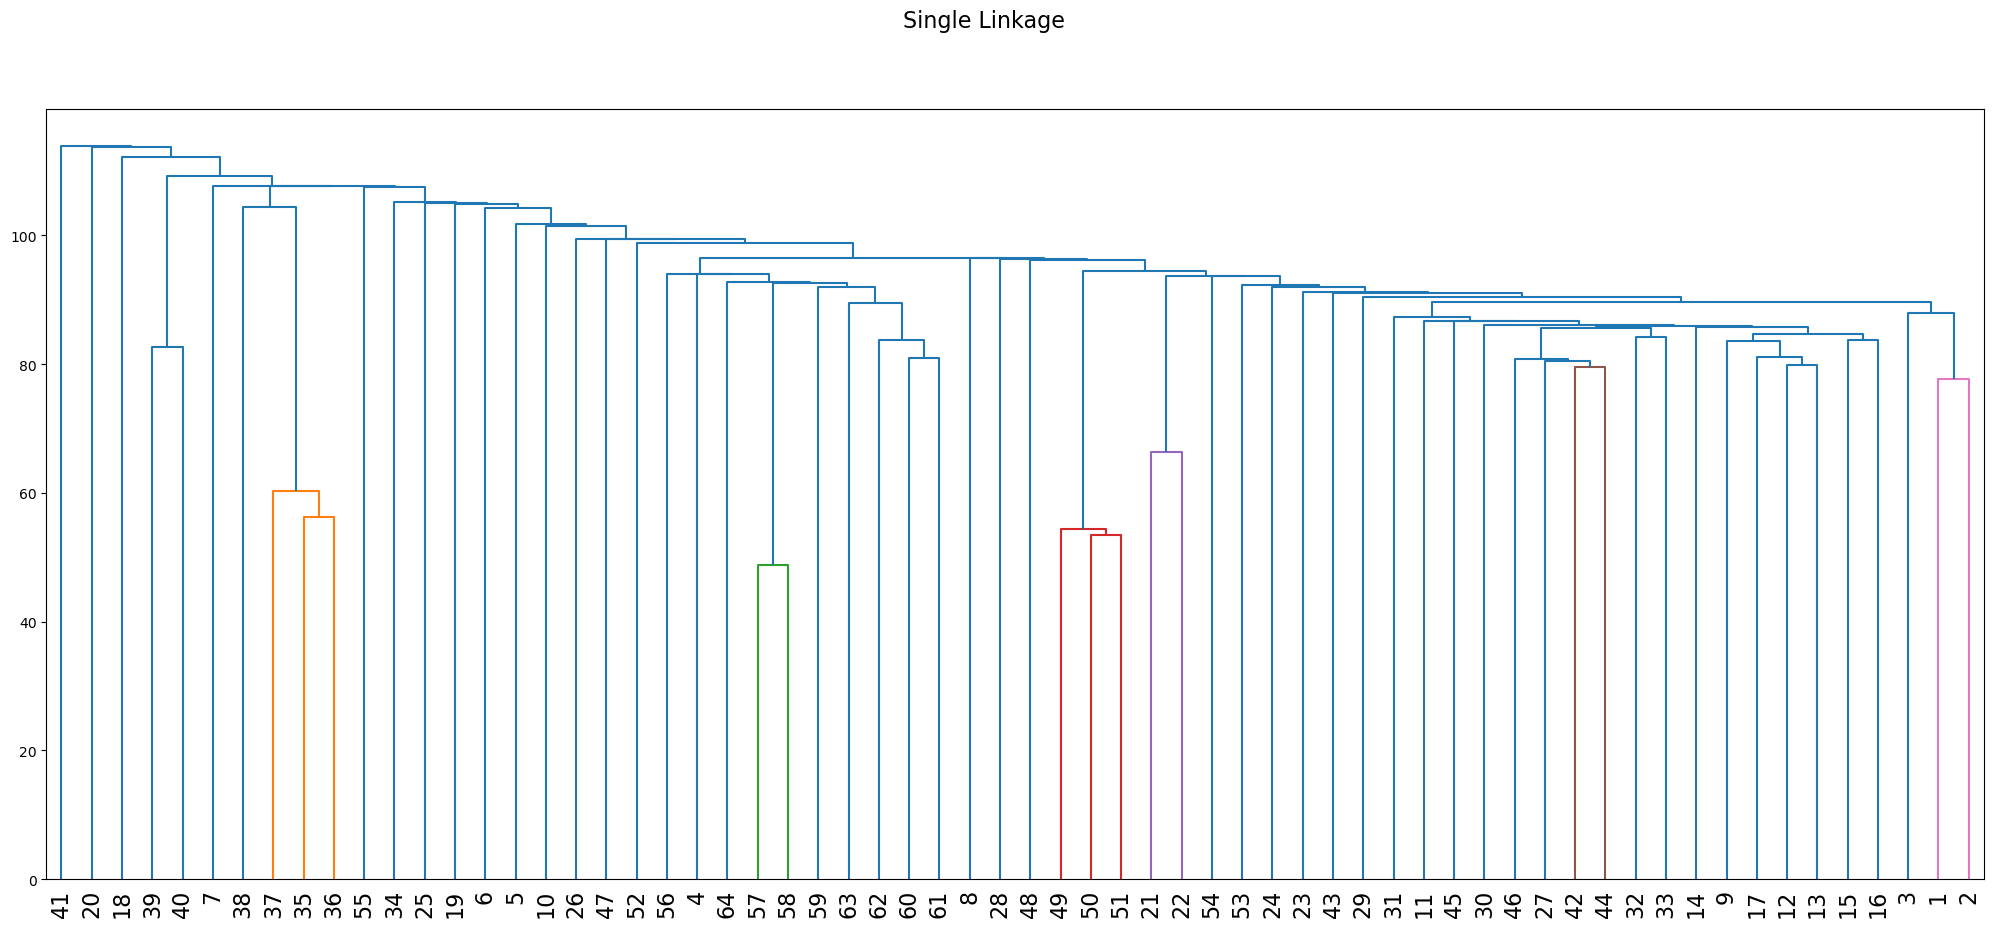

In [31]:
#importing from linkage and dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# For Single Linkage
single = linkage(df_Standardized, 'single')

fig = plt.figure(figsize=(25, 10))
fig.suptitle("Single Linkage",size =16)
dn = dendrogram(single,leaf_font_size = 16,labels = df_Standardized.index)

plt.show()

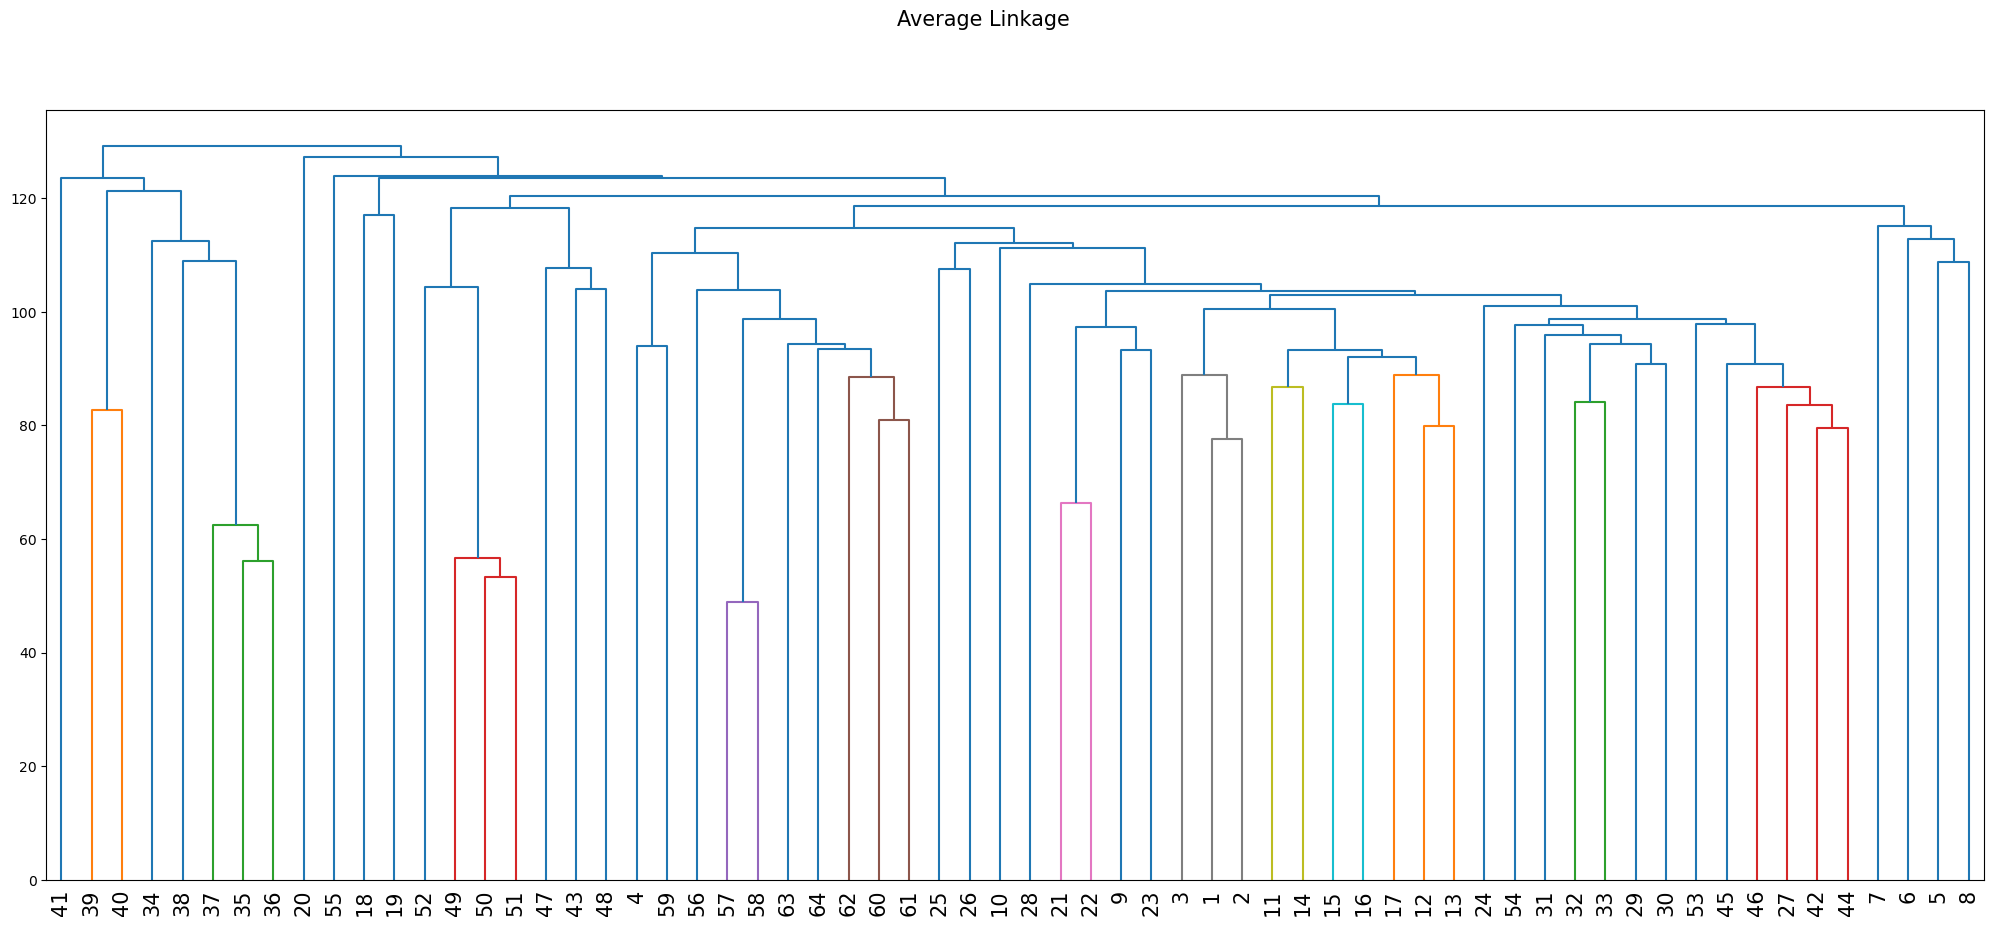

In [32]:
# For Average Linkage
average = linkage(df_Standardized, 'average')

fig = plt.figure(figsize=(25, 10))
fig.suptitle("Average Linkage",size=15)
dn = dendrogram(average,leaf_font_size = 15,labels = df_Standardized.index)

plt.show()

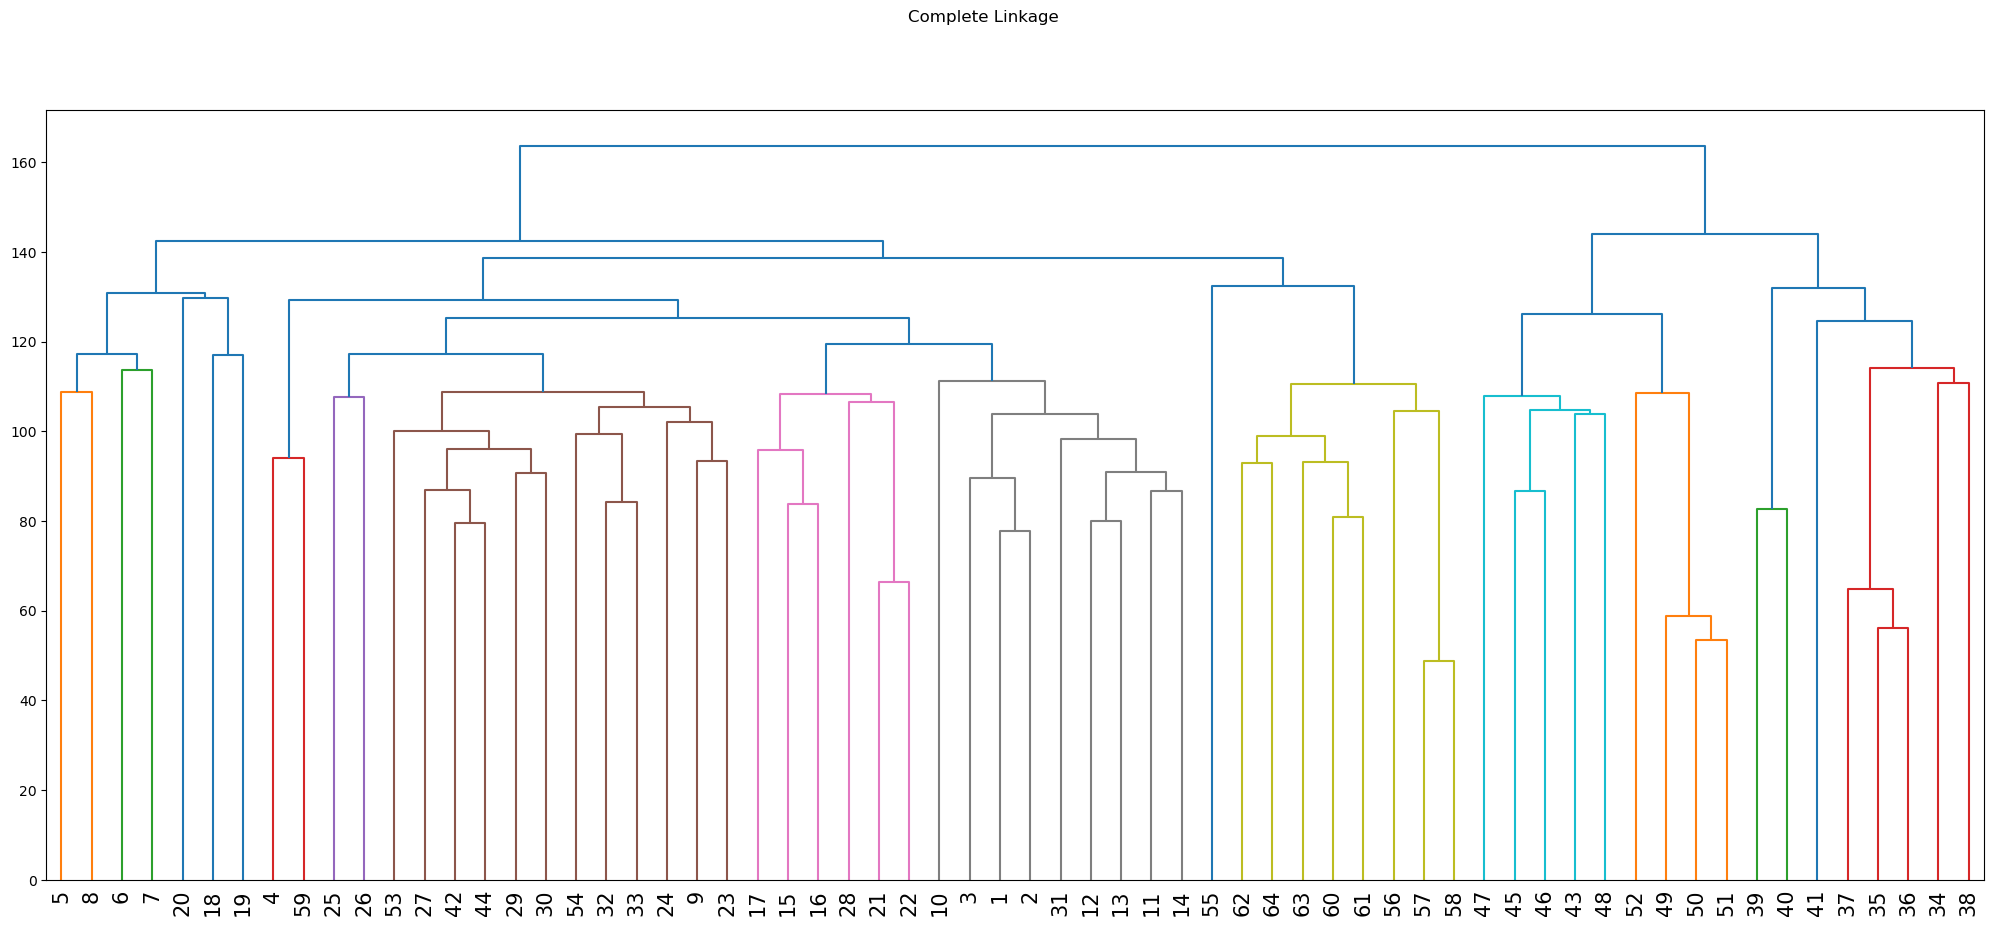

In [33]:
# For Complete Linkage.
complete = linkage(df_Standardized, 'complete')

fig = plt.figure(figsize=(25, 10))
fig.suptitle("Complete Linkage")
dn = dendrogram(complete,leaf_font_size = 15,labels = df_Standardized.index) 

plt.show()

Single linkage dendrograms display elongated and irregular clusters that resemble ladder steps, whereas complete and average linkage dendrograms feature more uniformly sized and balanced clusters. Clusters from complete linkage are more symmetrical than those from average linkage, with a maximum distance of 160 for complete linkage, compared to approximately 130 for average linkage and 115 for single linkage. This variation arises because complete linkage takes maximum distances into account during intermediate stages, while single linkage emphasizes minimum distances.

### b)

The most effective linkage method identified is Complete Linkage, which effectively clusters similar cancer types at comparable heights in the dendrogram. This leads to well-defined and distinct colors within its subclusters, making the clustering straightforward to interpret. Conversely, other clustering methods seem chaotic and do not yield significant insights.

### c)

5 clusters are obtained at a cutoff distance of 139.

### d)

In [35]:
from scipy.cluster.hierarchy import fcluster

col_labels = fcluster(complete, t = 5, criterion = 'maxclust')
pd.crosstab(df.index, col_labels)

col_0,1,2,3,4,5
row_0,,,,,
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
60,0,0,1,0,0
61,0,0,1,0,0
62,0,0,1,0,0
